<a href="https://colab.research.google.com/github/Yogesh-dahake08/Data-Science-Project-Series/blob/main/Project_1_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Prediction**


Data Science Projects-Predictive Modeling

Name - Yogesh Dahake

**Github Link**: - https://github.com/Yogesh-dahake08/Data-Science-Project-Series

**Overview:**

Welcome to the Stock Market Prediction project, a part of my internship phase in Data Science at Nexus info. The primary focus of this project is predictive modeling using a real-world stock market dataset.

*Dataset:*

The dataset for this project is sourced from Kaggle and is available.

We will predict the closing stock prices by utilizing other features within the dataset. The dataset comprises records of stock prices for 31 companies on specific dates.

**Methodology:**

1. Data collection
2. Data cleaning
3. Exploratory Data Analysis (EDA)
4. Visualizations
5. Model Building and Training
6. Model Evaluation
7. Conclusions

# **1. Data Collection**

## Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

## Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Dataset

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/infolimpioavanzadoTarget.csv")
dataset.head(3)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0


# **2. Data Cleaning**

We can see that the dataset contains 7781 rows and 1285 columns

In [4]:
dataset.shape

(7781, 1285)

Out of all the features or columns, we only need **"date","open","high","low","adjclose","close"** for the project. So let's first extract them from the entire dataset.

In [5]:
dataset=dataset[["date","open","high","low","adjclose","close"]]


Let's see whether all the features are in correct format  or not

In [6]:
dataset.dtypes

date         object
open        float64
high        float64
low         float64
adjclose    float64
close       float64
dtype: object

We can observe that date column is in object type. So let's convert it into data type

In [7]:
dataset["date"]=pd.to_datetime(dataset["date"])

<ipython-input-7-46535f7d3f11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["date"]=pd.to_datetime(dataset["date"])


In [8]:
dataset.dtypes

date        datetime64[ns]
open               float64
high               float64
low                float64
adjclose           float64
close              float64
dtype: object

We can observe that there are no null values in the dataset.

In [9]:
dataset.isnull().sum()

date        0
open        0
high        0
low         0
adjclose    0
close       0
dtype: int64

# **3. Exploratory Data Analysis (EDA)**

In [10]:
dataset.corr()

,date,open,high,low,adjclose,close
date,1.000000,-0.033488,-0.033723,-0.032705,-0.031431,-0.032921
open,-0.033488,1.000000,0.999876,0.999878,0.999615,0.999660
high,-0.033723,0.999876,1.000000,0.999875,0.999827,0.999862
low,-0.032705,0.999878,0.999875,1.000000,0.999816,0.999859
adjclose,-0.031431,0.999615,0.999827,0.999816,1.000000,0.999965
close,-0.032921,0.999660,0.999862,0.999859,0.999965,1.000000


The below table gives an idea basic description about the features

In [11]:
dataset.describe()

,date,open,high,low,adjclose,close
count,7781,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000
mean,2022-07-02 15:23:39.920318720,34.990220,35.655999,34.301243,34.483147,34.964414
min,2022-01-03 00:00:00,0.410000,0.435000,0.405000,0.408000,0.408000
25%,2022-04-01 00:00:00,4.050000,4.130000,3.980000,3.960000,4.030000
50%,2022-07-05 00:00:00,10.080000,10.110000,10.005000,10.061000,10.080000
75%,2022-10-03 00:00:00,24.350000,24.500000,24.080000,22.466007,24.250000
max,2022-12-30 00:00:00,795.739990,799.359985,784.960022,783.376221,797.489990
std,NaN,99.841502,101.451058,98.073945,98.603879,99.790823


In [12]:
dataset.head()

,date,open,high,low,adjclose,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000


We can observe that the records for different companies recorded on a single date are not in sequential order. Let's sort the data to enhance its visual presentation.

In [13]:
dataset.sort_values(by="date",inplace=True)

In [14]:
dataset.head()

,date,open,high,low,adjclose,close
0,2022-01-03,17.799999,18.219,17.50,17.76,17.76
6024,2022-01-03,7.200000,7.700,7.20,7.70,7.70
502,2022-01-03,2.330000,2.450,2.29,2.45,2.45
3514,2022-01-03,6.904000,6.950,6.32,6.75,6.75
6526,2022-01-03,3.320000,3.360,3.03,3.36,3.36


In [15]:
dataset.reset_index(inplace=True)

In [16]:
dataset.drop("index",axis=1,inplace=True)
dataset.head(3)

,date,open,high,low,adjclose,close
0,2022-01-03,17.799999,18.219,17.50,17.76,17.76
1,2022-01-03,7.200000,7.700,7.20,7.70,7.70
2,2022-01-03,2.330000,2.450,2.29,2.45,2.45


# **4. Visualizing the Trend of Stocks**

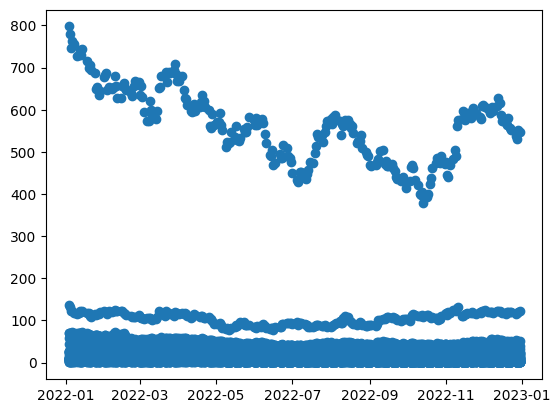

In [17]:
plt.scatter(dataset.date,dataset["close"],linestyle="-")


The plot is not visually clear and appears cluttered. Let's explore alternative plotting methods to improve the visualization.

<Axes: xlabel='date', ylabel='close'>

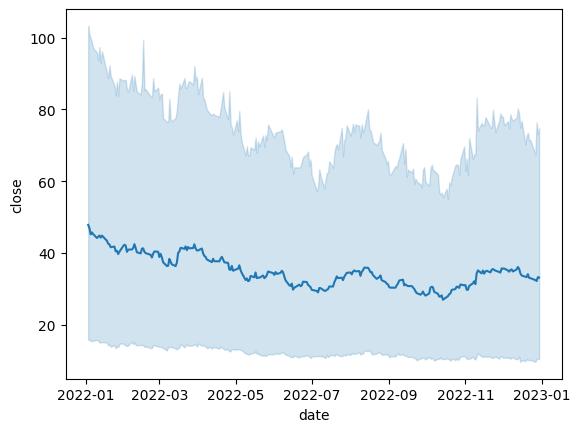

In [18]:
sns.lineplot(data=dataset,x="date",y="close")


Let's investigate the factors contributing to the suboptimal appearance of the stock price graph.

In [19]:
dataset.head(3)

,date,open,high,low,adjclose,close
0,2022-01-03,17.799999,18.219,17.50,17.76,17.76
1,2022-01-03,7.200000,7.700,7.20,7.70,7.70
2,2022-01-03,2.330000,2.450,2.29,2.45,2.45



We should take note that there are multiple records for different companies on a single date. To address this, let's begin by grouping the data by date, allowing us to visualize the stock price trends more effectively.

In [20]:
dataset1=dataset.groupby("date").mean()
dataset1

,open,high,low,adjclose,close
date,,,,,
2022-01-03,47.551838,48.235644,46.823646,46.953071,47.817451
2022-01-04,47.705323,47.967645,46.018128,46.050544,46.905807
2022-01-05,46.421322,46.831967,44.961322,44.337091,45.172290
2022-01-06,45.011323,46.225678,44.102968,44.875540,45.720032
2022-01-07,45.523710,46.091709,44.555870,44.400238,45.240773
...,...,...,...,...,...
2022-12-23,32.778548,33.234936,32.348162,32.749994,32.979193
2022-12-27,32.876000,33.137322,32.169129,32.209201,32.437000
2022-12-28,32.415549,32.840903,31.862807,31.949082,32.175742


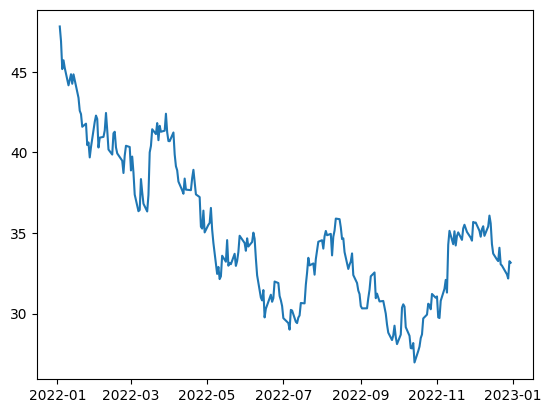

In [21]:
plt.plot(dataset1.index,dataset1["close"],linestyle="-")


This provides a clear representation of the stock prices trend. It is evident that there is a decreasing trend in prices from the beginning to the end of 2022.

## Preparing the data for model training


Let's separate the data into features and target data.

In [22]:
X,Y=dataset[["open","high","low","adjclose"]],dataset[["close"]]

Let's standardize the features of a dataset, ensuring that they have a mean of 0 and a standard deviation of 1.

In [23]:
ss =StandardScaler()
X = ss.fit_transform(X)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6224, 4)
(1557, 4)
(6224, 1)
(1557, 1)


# **5. Model Building and Training**

As our objective is to predict continuous values, specifically stock prices, it is advisable to construct regression models. Therefore, we will proceed to build Linear Regression, Lasso Regression, and Ridge Regression models. The intention is to compare and evaluate the performance of each model to determine the most effective one for our prediction task.

## LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
r2_lr=lr.score(x_test,y_test)
r2_lr

0.999949111470123

In [28]:
mse_lr=mean_squared_error(y_test,lr.predict(x_test))
mse_lr

0.46678511523427274

## Lasso Regression

In [29]:
lm = Lasso(alpha=0.001)
lm.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.801e+03, tolerance: 6.319e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [30]:
r2_lm=lm.score(x_test,y_test)
r2_lm

0.9997457516507312

In [31]:
mse_lm=mean_squared_error(y_test,lm.predict(x_test))

## Ridge Regression

In [32]:
rm = Ridge(alpha=1)
rm.fit(x_train,y_train)

Ridge(alpha=1)

In [33]:
r2_rm=rm.score(x_test,y_test)
r2_rm

0.9999308927047693

In [34]:
mse_rm=mean_squared_error(y_test,rm.predict(x_test))
mse_rm

0.63390034740064

# **6. Model Evaluation**

Let's tabulate the accuracy and mse of all the three model for better evaluation

In [35]:
results = pd.DataFrame({"Metrics":["r2score","MSE"],"LinearReg":[r2_lr,mse_lr],"LassoReg":[r2_lm,mse_lm],"RidgeReg":[r2_rm,mse_rm]})
results

,Metrics,LinearReg,LassoReg,RidgeReg
0,r2score,0.999949,0.999746,0.999931
1,MSE,0.466785,2.332143,0.633900


From above table it is clear that all the models are very good for predicting the closing stock prices with the given features.

# **7. Conclusions**

* We cleaned and extracted the necessary data from the entire dataset and stored it in **dataset**.

* We performed EDA in which we found that **correlations** between the features. We also **sorted** the data for better maintenance of the data.

* We observed the trend of stock prices and concluded that there is a **decrease in the trend**.

* Finally we **built multiple Regression models**, evaluated them and concluded that all the models are performing well and we are **free to use** any model to predict the stock prices.